<a href="https://colab.research.google.com/github/VarunKandula/Breast-Cancer-Diagnosis-SL/blob/master/Breast_Cancer_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diagnosing Breast Cancer  via Supervised Learning

In this project, I will be using this [Brest Cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) dataset to classify tumrs measurements as benign or malignant. This dataset has 569 samples belonging to 2 classes, with 212 being malignant and 357 benign. Each sample has 30 features indicated as real, positive numbers.

First, I must load the data and create a training set. 

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer() # dictionary-like sklearn object

x = data['data']
y = data['target']
labels = data['target_names']
features = data['feature_names']
description = data['DESCR']


print (description)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
print(x)
print(x.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


In [ ]:
print(y)
print(y.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
print(labels)

['malignant' 'benign']


In [ ]:
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Since the first 80% samples is for traiing, we must seperate it for the entire dataset and only use the remaiing 20% for testing. 

In [ ]:
n = x.shape[0]
split = 0.8
bar = int(split*n)

x_train = x[:bar]
y_train = y[:bar]

x_test = x[bar:]
y_test = y[bar:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


# Scaling and Visualizing in Lower Dimensions (PCA) 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
scaled = StandardScaler().fit_transform(x_train) 
print(scaled.mean())
print(scaled.var())

-1.9988894544459961e-16
0.9999999999999999


Through this PCA, we will be able to reduce the dimensionality of the deata from 30 to 2, and then run k-means to cluster on the low-dimensional data. 

In [ ]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled)

k = 2
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(reduced)

Since we have clustered the data, we can scatter it. 

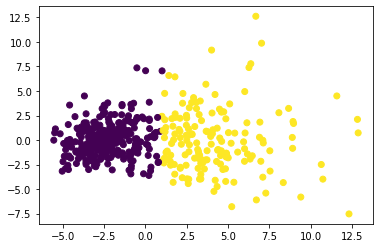

In [ ]:
plt.scatter(reduced[:,0], reduced[:,1], c=clusters)

After the analysis, we can see a clear distinction between the 2 dimensions. Since the label array is made up of 1's and 0's (binary), we can use this to measure the accuracy of the plot. Since we already know that there are 212 malignant and 357 benign samples, we can deduce an approximate 3:5 ratio between the 2. So, if we see the l-mean of the set, the ration should be similar. 

In [ ]:
n_malign = np.sum(clusters)
n_benign = len(clusters) - n_malign

print("# of malignant: ", n_malign) 
print("# of benign: ", n_benign)
print(212 / 357) # given ratio
print(n_malign / n_benign) #calculated ratio

# of malignant:  163
# of benign:  292
0.5938375350140056
0.5582191780821918


# Supervised Classification

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(x_train,y_train)
preds = clf.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
print("Accuracy: ", accuracy_score(y_test,preds))
print("F1 score: ", f1_score(y_test,preds))



Accuracy:  0.9385964912280702
F1 score:  0.9617486338797814


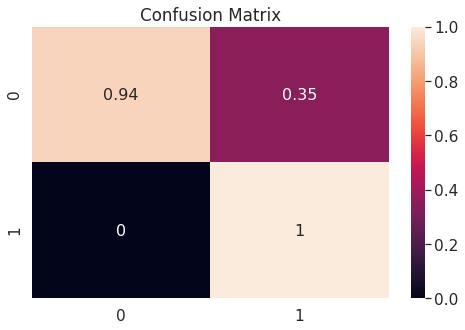

In [ ]:
import seaborn as sn
sn.set(font_scale=1.4)#for label size
plt.figure(figsize = (8,5))
plt.title("Confusion Matrix")
cm = normalize(confusion_matrix(y_test,preds,labels=[0,1]))
sn.heatmap(cm, annot=True, annot_kws={'size':16})

# Decision Trees

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
preds = clf.predict(x_test)

Accuracy:  0.8596491228070176
F1 score:  0.9036144578313254


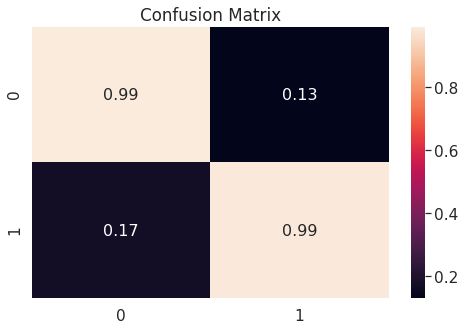

In [ ]:
# This is the same block of code being reapplied;
# it should be refactored into a function eventually
print("Accuracy: ", accuracy_score(y_test,preds))
print("F1 score: ", f1_score(y_test,preds))

cm = normalize(confusion_matrix(y_test,preds,labels=[0,1]))

import seaborn as sn
sn.set(font_scale=1.4)#for label size
plt.figure(figsize = (8,5))
plt.title("Confusion Matrix")
sn.heatmap(cm, annot=True, annot_kws={'size':16})

Comparing the 2 models, there isn't much difference in the performance. Again the decision tree does slightly worse at 88.5% accuracy than the other two, but each approach seems to be doing its job. 

# Multilayer perceptron (MLP)

MLP is another name for a relatively shallow densely-connected neural network. This model is interesting because it actually allows us to see the effects of a negative performance caused by overfitting if we make the hidden layers too complex.

It uses ReLU for its activation function and SGD to optimize its parameters. We'll try a couple architectures with varying depth and number of units for each of their hidden layers.

In [ ]:
# Single 128-unit hidden layer
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(128), activation='relu', random_state=1)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
accuracy_score(y_test,preds)

0.8508771929824561

In [ ]:
# Two hidden layers with 64 and 48 units = 112 units in total
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(64,48), activation='relu', random_state=1)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
accuracy_score(y_test,preds)

0.9473684210526315

In [ ]:
# Three smaller hidden layers of 28 units each = 84 units in total
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(28,28,28), activation='relu', random_state=1)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
accuracy_score(y_test,preds)

0.9035087719298246

In [ ]:
# Most powerful architecture, 4 layers of 128,64,48,28 = 268 units
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(128,64,48,28), activation='relu', random_state=1)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
accuracy_score(y_test,preds)

0.7719298245614035

What we see is the most powerful networks achieving decreased performance even relative to the more basic linear models, while the two-layer medium sized architecture achieved the record 95% accuracy.